1) Display the Kyiv.
2) Calculate and display the shortest path between free points within the city.
3) Provide object statistics.

In [1]:
import folium
from branca.element import Figure
from folium import plugins

import osmnx as ox
import networkx as nx
import os
import pandas as pd

In [2]:
############################################### (1)
Kyiv=[50.450001, 30.523333]
m = folium.Map(location=Kyiv,
                        zoom_start=12,
                        tiles='openstreetmap')                        
m

In [3]:
fig=Figure(width=550,height=350)

In [4]:
m1=folium.Map(width=550,height=350,location=Kyiv,zoom_start=11,min_zoom=8,max_zoom=14)
fig.add_child(m1)
m1

In [5]:
#graphml from https://dataverse.harvard.edu/file.xhtml?fileId=4287571&version=2.0 
created_area_graph =  ox.load_graphml('kyiv-3517.graphml')
created_area_graph

In [6]:
G=created_area_graph

In [7]:
def plot_graph_k(G):
  ec = ox.plot.get_edge_colors_by_attr(G, attr="length", num_bins=5)

  # otherwise, when num_bins is None (default), linearly map one color to each node/edge by value
  ec = ox.plot.get_edge_colors_by_attr(G, attr="length")

  # plot the graph with colored edges
  fig, ax = ox.plot_graph(G, node_size=5, edge_color=ec, bgcolor="k")

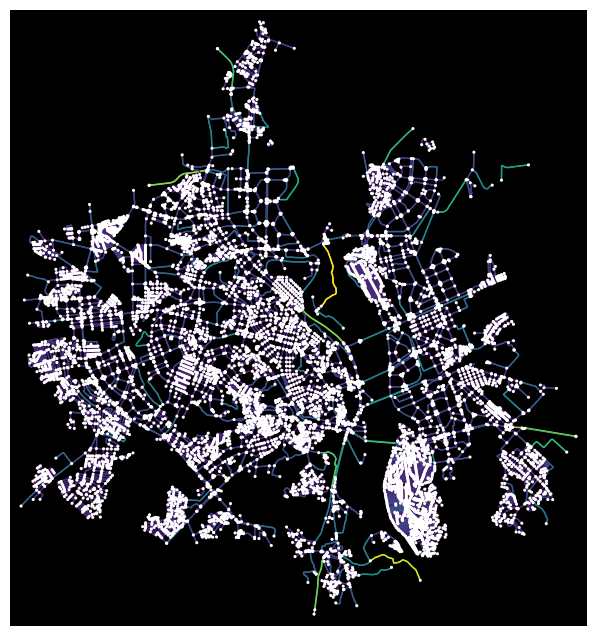

In [8]:
plot_graph_k(G)

In [9]:
def find_shortest_path_between_two_points(G,point1,point2):
  #w = "travel_time"
  node_point1=ox.nearest_nodes(G,point1[1],point1[0])
  node_point2=ox.nearest_nodes(G,point2[1],point2[0])
  route_point1_point2 = ox.shortest_path(G, node_point1, node_point2)#, weight=w
  return route_point1_point2  

In [10]:
point1=(50.459409380358025, 30.418061969911513)
point2= (50.42415868603902, 30.521237448792384)
#get distance
shortest_route=find_shortest_path_between_two_points(G,point1,point2)
shortest_route

[26304055,
 440015738,
 440015741,
 3567082814,
 2527949797,
 1763861749,
 440015689,
 3084001847,
 367371949,
 367371933,
 373894153,
 370330430,
 26260829,
 26260830,
 366103402,
 378554503,
 26303544,
 26303494,
 249329563,
 249329775,
 2935369577,
 440058717,
 365308756,
 1965696420,
 1466090929,
 26303466,
 26303476,
 372981388,
 26051762,
 1307798791,
 26337558,
 26337692,
 248772293,
 10980673,
 2522195122,
 26546563,
 26228241,
 255019687,
 26201461,
 26546592,
 306006478,
 306006481,
 26201310,
 249372047,
 26201325]

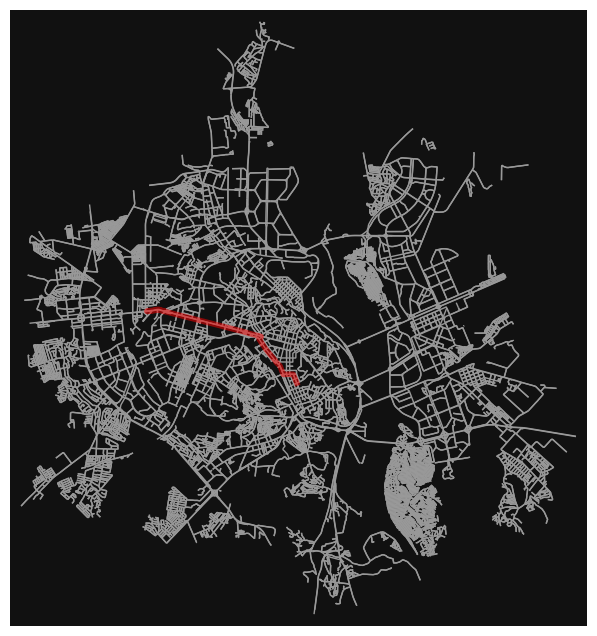

In [11]:
fig, ax = ox.plot_graph_route(G, shortest_route, orig_dest_size=0, node_size=0)

In [12]:
folium.Marker(location=[50.459409380358025, 30.418061969911513],popup='Станція метро\nБерестейська\nКиїв, 02000\n',tooltip='Click here to see info').add_to(m)
folium.Marker(location=[50.42415868603902, 30.521237448792384],popup='Станція метро\nПалац "Україна"\nКиїв, 02000\n',tooltip='Click here to see info').add_to(m)

fg = folium.FeatureGroup(name='legend name', show=True)
ox.plot_route_folium(G, shortest_route, route_color='blue', 
                    route_map=fg, tooltip='some tooltip')
m.add_child(fg)
display(m)

C:\Users\VKrasulya\AppData\Local\Temp\ipykernel_768\3471071924.py:5: UserWarning: The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  ox.plot_route_folium(G, shortest_route, route_color='blue',


In [13]:
# List of metro stations
metro_station_names = [
    "Akademmistechko",
    "Zhytomyrska",
    "Sviatoshyn",
    "Nyvky",
    "Beresteiska",
    "Shuliavska",
    "Politekhnichnyi Instytut",
    "Vokzalna",
    "Universytet",
    "Teatralna",
    "Khreshchatyk",
    "Arsenalna",
    "Dnipro",
    "Hidropark",
    "Livoberezhna",
    "Darnytsia",
    "Chernihivska",
    "Lisova",
    "Heroiv Dnipra",
    "Minska",
    "Obolon",
    "Pochaina",
    "Tarasa Shevchenka",
    "Kontraktova Ploshcha",
    "Poshtova Ploshcha",
    "Maidan Nezalezhnosti",
    "Ploshcha Ukrainskykh Heroiv",
    "Olimpiiska",
    "Palats Ukraina",
    "Lybidska",
    "Demiivska",
    "Holosiivska",
    "Vasylkivska",
    "Vystavkovyi Tsentr",
    "Ipodrom",
    "Teremky",

    "Syrets",
    "Dorohozhychi",
    "Lukianivska",

    "Zoloti Vorota",
    "Palats Sportu",
    "Klovska",
    "Pecherska",
    "Zvirynetska",
    "Vydubychi",

    "Slavutych",
    "Osokorky",
    "Pozniaky",
    "Kharkivska",
    "Vyrlytsia",
    "Boryspilska",
    "Chervonyi Khutir"
]
metro_station_opening_dates = [
    "2003-5-24",
    "2003-5-24",
    "1971-11-5",
    "1971-11-5",
    "1971-11-5",
    "1963-11-5",
    "1963-11-5",
    "1960-11-6",
    "1960-11-6",
    "1987-11-6",
    "1960-11-6",
    "1960-11-6",
    "1960-11-6",
    "1965-11-5",
    "1965-11-5",
    "1965-11-5",
    "1968-11-4",
    "1968-12-5",
    "1982-11-6",
    "1982-11-6",
    "1980-12-19",
    "1980-12-19",
    "1980-12-19",
    "1976-12-17",
    "1976-12-17",
    "1976-12-17",
    "1981-12-19",
    "1981-12-19",
    "1984-12-30",
    "1984-12-30",
    "2010-12-15",
    "2010-12-15",
    "2010-12-15",
    "2011-12-27",
    "2012-10-25",
    "2013-10-25",

    "2004-10-14",
    "2000-3-30",
    "1996-12-30",

    "1989-12-31",
    "1989-12-31",
    "1989-12-31",
    "1997-12-27",
    "1991-12-30",
    "1991-12-30",

    "1992-12-30",
    "1992-12-30",
    "1994-12-28",
    "1994-12-28",
    "2006-3-8",
    "2005-8-23",
    "2008-5-23"
]
depths_meters = [
    11, 10, 12, 12.5, 11, 92, 55, 42, 87, 70, 60, 105.5, 0, 0, 0, 0, 0, 0,
    5, 8, 6.5, 6, 7, 8, 10, 60, 72, 37, 32, 22,  12, 12,
    5, 15, 12, 60, 76, 69, 90, 96.5, 72, 40, 89, 66, 8, 7, 9, 12, 8, 8, 8, 8
]
coordinates =[]
print([len(i) for i in [metro_station_names,metro_station_opening_dates,depths_meters]])
data={'Names':metro_station_names,
      'Open':metro_station_opening_dates,
      'Depths':depths_meters
    
}
metro_stations_coordinates = {
    "Akademmistechko": (50.464423, 30.367568),
    "Zhytomyrska": (50.459712, 30.364122),
    "Sviatoshyn": (50.451736, 30.356254),
    "Nyvky": (50.454500, 30.370922),
    "Beresteiska": (50.457064, 30.476586),
    "Shuliavska": (50.453535, 30.466092),
    "Politekhnichnyi Instytut": (50.450134, 30.459917),
    "Vokzalna": (50.448923, 30.488317),
    "Universytet": (50.444353, 30.516731),
    "Teatralna": (50.445289, 30.524193),
    "Khreshchatyk": (50.447216, 30.522388),
    "Arsenalna": (50.443364, 30.545325),
    "Dnipro": (50.441776, 30.576045),
    "Hidropark": (50.444865, 30.597366),
    "Livoberezhna": (50.450120, 30.619005),
    "Darnytsia": (50.453658, 30.635680),
    "Chernihivska": (50.460097, 30.655590),
    "Lisova": (50.468185, 30.676596),
    "Heroiv Dnipra": (50.476751, 30.676596),
    "Minska": (50.494533, 30.679064),
    "Obolon": (50.504214, 30.498798),
    "Pochaina": (50.508783, 30.489591),
    "Tarasa Shevchenka": (50.512550, 30.480302),
    "Kontraktova Ploshcha": (50.522549, 30.516818),
    "Poshtova Ploshcha": (50.450225, 30.528455),
    "Maidan Nezalezhnosti": (50.450441, 30.524425),
    "Ploshcha Ukrainskykh Heroiv": (50.451993, 30.514867),
    "Olimpiiska": (50.433896, 30.516392),
    "Palats Ukraina": (50.420875, 30.520077),
    "Lybidska": (50.411359, 30.522755),
    "Demiivska": (50.400991, 30.528932),
    "Holosiivska": (50.388261, 30.497749),
    "Vasylkivska": (50.379580, 30.477332),
    "Vystavkovyi Tsentr": (50.357893, 30.438777),
    "Ipodrom": (50.348381, 30.434678),
    "Teremky": (50.332573, 30.446861),
    "Syrets": (50.472651, 30.363816),
    "Dorohozhychi": (50.469507, 30.421216),
    "Lukianivska": (50.463914, 30.466531),
    "Zoloti Vorota": (50.448937, 30.513678),
    "Palats Sportu": (50.439104, 30.520371),
    "Klovska": (50.434889, 30.526283),
    "Pecherska": (50.423222, 30.540013),
    "Zvirynetska": (50.412947, 30.559571),
    "Vydubychi": (50.408507, 30.579944),
    "Slavutych": (50.397287, 30.606768),
    "Osokorky": (50.398795, 30.626708),
    "Pozniaky": (50.398110, 30.643757),
    "Kharkivska": (50.400821, 30.663073),
    "Vyrlytsia": (50.401477, 30.683185),
    "Boryspilska": (50.403805, 30.706574),
    "Chervonyi Khutir": (50.397590, 30.737943)
}
coordinates=[list(i) for i in metro_stations_coordinates.values()]
# Create a DataFrame
data['Coordinates']=coordinates
df = pd.DataFrame.from_dict(data)

df

[52, 52, 52]


,Names,Open,Depths,Coordinates
0,Akademmistechko,2003-5-24,11.0,"[50.464423, 30.367568]"
1,Zhytomyrska,2003-5-24,10.0,"[50.459712, 30.364122]"
2,Sviatoshyn,1971-11-5,12.0,"[50.451736, 30.356254]"
3,Nyvky,1971-11-5,12.5,"[50.4545, 30.370922]"
4,Beresteiska,1971-11-5,11.0,"[50.457064, 30.476586]"
5,Shuliavska,1963-11-5,92.0,"[50.453535, 30.466092]"
6,Politekhnichnyi Instytut,1963-11-5,55.0,"[50.450134, 30.459917]"
7,Vokzalna,1960-11-6,42.0,"[50.448923, 30.488317]"
8,Universytet,1960-11-6,87.0,"[50.444353, 30.516731]"
9,Teatralna,1987-11-6,70.0,"[50.445289, 30.524193]"


In [17]:
incidents = plugins.MarkerCluster().add_to(m)

# loop through the dataframe and add each data point to the mark cluster
for l,n, label, y in zip(df['Coordinates'], df['Names'], df['Depths'],df['Open']):
    folium.Marker(
        location=l,
        icon=None,
        popup=f'{n}\n{str(l)}\nDepth:{str(label)}\nOpened:{y}'
    ).add_to(incidents)

# display map
m